# Comparing Revenue Per User Between Referral and Non-Referral Groups

###  Objective

Understand how effective the **referral program** is on the Bharat Cash app by comparing the **Revenue Per User (RPU)** between:
- Users who joined via **referrals**
- Users who joined **organically (non-referral)**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load data
df_login = pd.read_csv("6_1_bharatcash_overall_daily_login.csv")
df_referral = pd.read_csv("6_2_from_referral_bharatcash.csv")
df_referral_rev = pd.read_csv("6_3_rev_from_referral_bharatcash.csv")
df_overall_rev = pd.read_csv("6_4_rev_overall_bharatcash.csv")

In [3]:
df_login.head(5)

,adv_id,app_id,day
0,eb766bea-b9d4-4508-b0a4-bbaf6bd910da,bharat_cash_incent,10/4/2024
1,eb766bea-b9d4-4508-b0a4-bbaf6bd910da,bharat_cash_incent,10/9/2024
2,eb766bea-b9d4-4508-b0a4-bbaf6bd910da,bharat_cash_incent,10/5/2024
3,eb766bea-b9d4-4508-b0a4-bbaf6bd910da,bharat_cash_incent,10/7/2024
4,eb766bea-b9d4-4508-b0a4-bbaf6bd910da,bharat_cash_incent,10/12/2024


In [4]:
df_referral.head(5)

,referre_adv_id,created_at
0,3f99ad4b-490f-4b4e-bb37-2a3a9f9901f8,2024-10-03 11:54:53.305014+00:00
1,fa31627c-5e01-41ef-a2ce-fef7b16ab77c,2024-10-03 11:53:42.989057+00:00
2,ca7518b7-51f2-425f-ada1-cc22490febba,2024-10-03 11:54:40.334748+00:00
3,5e8837ca-8bf2-4389-8c41-48b2998b7526,2024-10-03 11:54:22.953461+00:00
4,f89c5d77-53c3-4ffc-a131-ea2edf9431f0,2024-10-03 11:55:24.023826+00:00


In [5]:
df_referral_rev.head(5)

,adv_id,revenue_in_usd
0,22a4bbb3-a2dc-417b-8b66-74e77c1343dd,0.358608
1,a20f6271-9511-4f1e-b417-d96a554279e9,0.358608
2,a2fad044-1f12-4673-b491-36bf625e9501,0.010041
3,8c98490d-4dce-4159-9385-e59a6d04403f,0.010000
4,8c98490d-4dce-4159-9385-e59a6d04403f,0.020000


In [6]:
df_overall_rev.head(5)

,adv_id,revenue_in_usd
0,82e77d80-06dc-490a-b997-995deec71282,0.009922
1,44af1bc8-f5a0-49ce-857f-8e3cb9515946,0.010000
2,44af1bc8-f5a0-49ce-857f-8e3cb9515946,0.020000
3,7f2e63f4-034a-4a14-b70d-00f7a570ad56,0.009922
4,7f2e63f4-034a-4a14-b70d-00f7a570ad56,0.120000


In [7]:
# Identify referral and non-referral users
referral_users = set(df_referral['referre_adv_id'].unique())
all_users = set(df_login['adv_id'].unique())
non_referral_users = all_users - referral_users

In [8]:
# Calculate total revenue
# Merge revenue with referral and non-referral groups
df_overall_rev = df_overall_rev.dropna(subset=['adv_id', 'revenue_in_usd'])

df_overall_rev 

,adv_id,revenue_in_usd
0,82e77d80-06dc-490a-b997-995deec71282,0.009922
1,44af1bc8-f5a0-49ce-857f-8e3cb9515946,0.010000
2,44af1bc8-f5a0-49ce-857f-8e3cb9515946,0.020000
3,7f2e63f4-034a-4a14-b70d-00f7a570ad56,0.009922
4,7f2e63f4-034a-4a14-b70d-00f7a570ad56,0.120000
...,...,...
220607,9b2d218c-3145-4fc9-8e5f-5cd63c831595,0.036000
220608,4f1b0ed8-f2b3-4226-8c52-aa57301e4e41,0.009922
220609,ca772695-34c8-45e9-a266-7c238ed258f7,0.200821
220610,ca772695-34c8-45e9-a266-7c238ed258f7,0.009922


In [9]:
# Total revenue from referred users
referral_revenue = df_overall_rev[df_overall_rev['adv_id'].isin(referral_users)]['revenue_in_usd'].sum()

In [10]:
# Total revenue from non-referred users
non_referral_revenue = df_overall_rev[df_overall_rev['adv_id'].isin(non_referral_users)]['revenue_in_usd'].sum()

In [11]:
# Step 4: RPU Calculation
rpu_referral = referral_revenue / len(referral_users)
rpu_non_referral = non_referral_revenue / len(non_referral_users)
rpu_non_referral

0.9042554385583518

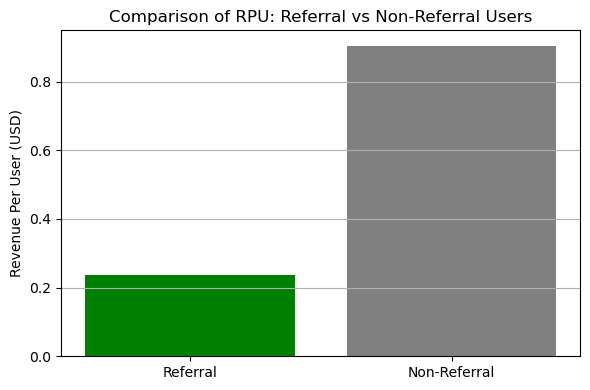

In [12]:
# Step 5: Visualization
plt.figure(figsize=(6, 4))
plt.bar(['Referral', 'Non-Referral'], [rpu_referral, rpu_non_referral], color=['green', 'gray'])
plt.ylabel("Revenue Per User (USD)")
plt.title("Comparison of RPU: Referral vs Non-Referral Users")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [13]:
# Step 6: Print Summary
print(f"Referral RPU: ${rpu_referral:.2f}")
print(f"Non-Referral RPU: ${rpu_non_referral:.2f}")

Referral RPU: $0.24
Non-Referral RPU: $0.90


### Methodology

1. **Identify referral users** using `referre_adv_id`.
2. **Identify non-referral users** as those present in login data but not in referral list.
3. Get **revenue** for each group from `6_4_rev_overall_bharatcash.csv`.
4. Calculate:
   - **RPU (Referral)** = Total revenue from referral users / No. of referral users
   - **RPU (Non-referral)** = (Total revenue from non-referral users) / No. of non-referral users
5. **Visualize** the comparison using a bar chart.

### Insights Expected

- Are referral users generating **more or less** revenue per user?
- Should the referral strategy be scaled or optimized?

## Conclusion

- Highlights the **impact of acquisition strategy** on revenue.
- Helps in making **data-driven marketing decisions**.
- Adds measurable ROI for referral campaigns.